# <center>CMPBIO210, IB120, IB201
# <center>"Introduction to Quantitative Methods in Biology"
# <center>Lecture 8. ODE Model of Cell Cycle regulation
## <center>Denis Titov

**The goal of this jupyter notebook is to discuss how to intruduce phase portrait and nonlinear dynamics and to formulate, solve and analyze ODE model of cell cycle**

Optional additional resources:  
https://www.cell.com/action/showPdf?pii=S0092-8674%2811%2900243-1  
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1993813/

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Phase portraits

Phase plots are very useful tools for analysis of systems of differential equations.  
Phase plots are similar to directions/slope field that we reviewed previously except we only plot dependable variables.  
  Lets use Lotka-Volterra model as initial example:
    
$\frac{dHare}{dt}=b \cdot Hare - k_1 \cdot Lynx \cdot Hare$  
  
$\frac{dLynx}{dt}=k_2 \cdot Lynx \cdot Hare - d \cdot Lynx$  

Quiver plot representation of a phase plot will consist of arrow that start at $x=Lynx$, $y=Hare$ and points in the direction $dx=\frac{dLynx}{dt}$, $dy=\frac{dHare}{dt}$. Phase plot represent the relationship between $Lynx$ and $Hare$ without time variable included.

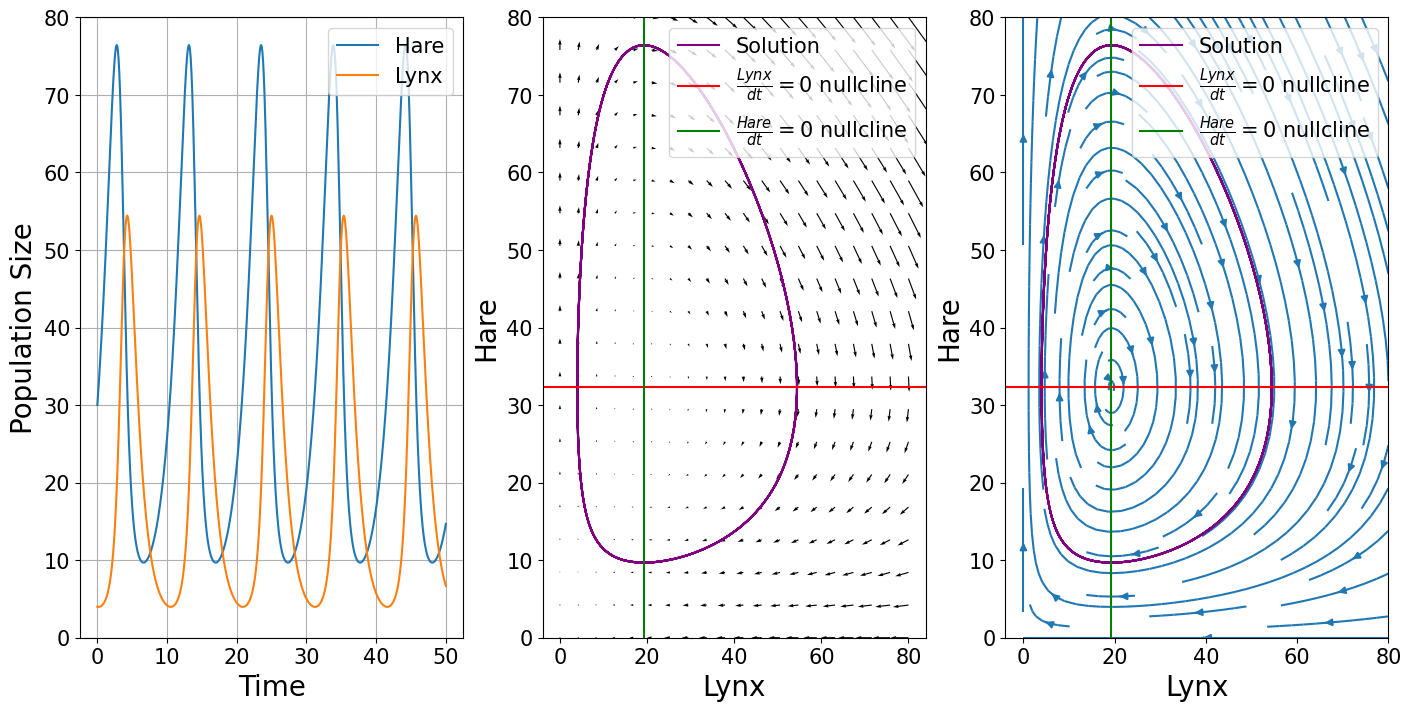

In [2]:
b = 0.54
k1 = 0.028
k2 = 0.026
d = 0.84

# Initialize multipanel figure that will contain all the plots
fig, axs = plt.subplots(
    nrows=1, ncols=3, figsize=(14, 7), dpi=100, constrained_layout=True
)

# Solve and plot ODE use solve_ivp()
def CellCycle(t, y):
    Hare, Lynx = y
    dHaredt = (b - k1 * Lynx) * Hare
    dLynxdt = (k2 * Hare - d) * Lynx
    return [dHaredt, dLynxdt]


initial_condition = [30, 4]
tspan = [0, 50]

# Remove atol, rtol to see how solution of phase plot change to get a sense of importance of these parameters
soln = solve_ivp(
    CellCycle,
    tspan,
    initial_condition,
    t_eval=np.linspace(tspan[0], tspan[1], 1000),
    atol=1e-10,
    rtol=1e-10,
)

axs[0].plot(soln.t, soln.y[0], label="Hare")
axs[0].plot(soln.t, soln.y[1], label="Lynx")


# Plot phase portrait
Hare, Lynx = np.mgrid[0:80:20j, 0:80:20j]

dHaredt = (b - k1 * Lynx) * Hare
dLynxdt = (k2 * Hare - d) * Lynx

axs[1].quiver(Lynx, Hare, dLynxdt, dHaredt)
axs[2].streamplot(Lynx, Hare, dLynxdt, dHaredt)


# Various plotting options for plot 1 only.
axs[0].set_xlabel("Time", fontsize=20)
axs[0].set_ylabel("Population Size", fontsize=20)

# Various plotting options for plots 2 and 3.
for ax in axs[1:3]:
    ax.grid(which="major", axis="both")
    ax.set_xlabel("Lynx", fontsize=20)
    ax.set_ylabel("Hare", fontsize=20)
    ax.plot(soln.y[1], soln.y[0], color="purple", label="Solution")
    ax.axhline(
        y=d / k2, xmin=0.0, xmax=50.0, color="r", label=r"$\frac{Lynx}{dt}=0$ nullcline"
    )
    ax.axvline(
        x=b / k1, ymin=0.0, ymax=50.0, color="g", label=r"$\frac{Hare}{dt}=0$ nullcline"
    )

# Various plotting options shares among all plots
for ax in axs:
    ax.tick_params(labelsize=15)
    ax.grid(which="major", axis="both")
    ax.set_ylim(0, 80)
    ax.legend(loc="upper right", fontsize=15)

Note that the oscillations entirely depend on initial conditions (i.e. Hare and Lynx population at t=0).  
So if Hare population changes for whatever reason then oscillations will change.  
The latter will not work for oscillations that control various molecular biology and physiology processes like heart beat, cell cycle etc as latter oscillation should maintin stable period and amplitude despite perturbations.

## Simplest model of Cell Cycle with just Cdk and APC
  
Desired property of the model:
- Stable oscillations that are independent of initial conditions  
- Use mechanistic info about the existance of cell cycle signaling components Cyclin, Cdk, APC, etc
  
Assumtions of the model:
- $CyclinCdk$ is produced at uniform rate $k_1$ independent of $CyclinCdk$ concentration
- $APC$ can exist as an active (we'll refer to it as just $APC^{Active}$) and inactive form (we'll refer to it as $APC^{Inactive}$) and $APC^{Total}$ is the combined concentration of $APC^{Active}$ and $APC^{Inactive}$  
- $CyclinCdk$ converts $APC^{Inactive}$ to $APC^{Active}$ through phosphorylation at a rate $k_3 \cdot CyclinCdk \cdot APC^{Inactive}$
- $APC^{Active}$ gets inactivated at a rate $k_4 \cdot APC^{Active}$  
- $APC^{Active}$ inactivates $CyclinCdk$ at a rate $k_2 \cdot CyclinCdk \cdot APC^{Active}$. Molecular mechanism of this is that Cyclin part of CyclinCdk is degraded by the proteosome as APC is a ubiquitin-ligase.
  
The model is then:  

$\frac{dCyclinCdk}{dt}=k_1 - k_2 \cdot CyclinCdk \cdot APC^{Active}$  
  
$\frac{dAPC^{Active}}{dt}=k_3 \cdot CyclinCdk \cdot APC^{Inactive} - k_4 \cdot APC^{Active}$

$\frac{dAPC^{Inactive}}{dt}= - k_3 \cdot CyclinCdk \cdot APC^{Inactive} + k_4 \cdot APC^{Active}$

$APC^{Total}= APC^{Active} + APC^{Inactive}$  
  
We can simplify the equations above because equations for $\frac{dAPC^{Active}}{dt}$ and $\frac{dAPC^{Inactive}}{dt}$ are really the same equation given that $APC^{Inactive}=APC^{Total} - APC^{Active}$ so we can eliminate one of them without loosing any information. And for convenience lets also set $APC^{Total}=1$ and rename $APC^{Active}$ into just $APC$.  
  
The model is then:  
  
$\frac{dCyclinCdk}{dt}=k_1 - k_2 \cdot CyclinCdk \cdot APC$  
  
$\frac{dAPC}{dt}=k_3 \cdot CyclinCdk \cdot (1-APC) - k_4 \cdot APC$  



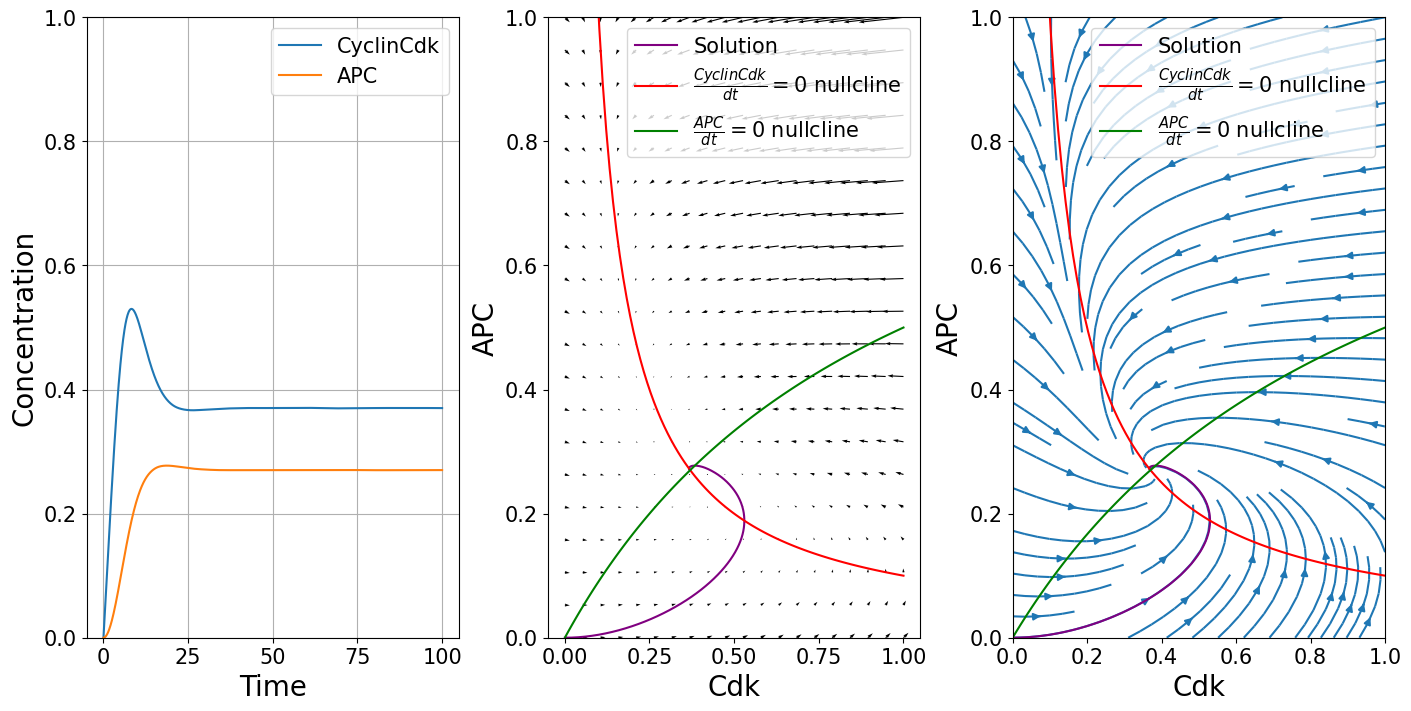

In [3]:
k1 = 0.1
k2 = 1
k3 = 0.1
k4 = 0.1

# Initialize multipanel figure that will contain all the plots
fig, axs = plt.subplots(
    nrows=1, ncols=3, figsize=(14, 7), dpi=100, constrained_layout=True
)

# Solve and plot ODE use solve_ivp()
def CellCycle(t, y):
    Cdk, APC = y
    dCdkdt = k1 - k2 * Cdk * APC
    dAPCdt = k3 * (1 - APC) * Cdk - k4 * APC
    return [dCdkdt, dAPCdt]


initial_condition = [0, 0]
tspan = [0, 100]

soln = solve_ivp(
    CellCycle, tspan, initial_condition, t_eval=np.linspace(tspan[0], tspan[1], 1000)
)

axs[0].plot(soln.t, soln.y[0], label="CyclinCdk")
axs[0].plot(soln.t, soln.y[1], label="APC")


# Plot phase portrait
APC, Cdk = np.mgrid[0:1:20j, 0:1:20j]

dCdkdt = k1 - k2 * Cdk * APC
dAPCdt = k3 * (1 - APC) * Cdk - k4 * APC

axs[1].quiver(Cdk, APC, dCdkdt, dAPCdt)
axs[2].streamplot(Cdk, APC, dCdkdt, dAPCdt)


# Various plotting options for plot 1 only.
axs[0].set_xlabel("Time", fontsize=20)
axs[0].set_ylabel("Concentration", fontsize=20)

# Various plotting options for plots 2 and 3.
for ax in axs[1:3]:
    ax.grid(which="major", axis="both")
    ax.set_xlabel("Cdk", fontsize=20)
    ax.set_ylabel("APC", fontsize=20)
    ax.plot(soln.y[0], soln.y[1], color="purple", label="Solution")
    Cdk_range = np.linspace(0.001, 1, 100)
    ax.plot(
        Cdk_range,
        k1 / (Cdk_range * k2),
        color="r",
        label=r"$\frac{CyclinCdk}{dt}=0$ nullcline",
    )
    ax.plot(
        Cdk_range,
        Cdk_range * k3 / (Cdk_range * k3 + k4),
        color="g",
        label=r"$\frac{APC}{dt}=0$ nullcline",
    )

# Various plotting options shares among all plots
for ax in axs:
    ax.tick_params(labelsize=15)
    ax.grid(which="major", axis="both")
    ax.set_ylim(0, 1)
    ax.legend(loc="upper right", fontsize=15)

It can be demostrated analytically that for the system above it is not possible to have oscillations because fixed point with positive $APC$ and $Cdk$ will always be a stable point at positive $k_1,k_2,k_3,k_4, APC^{Total}$. In order to have oscillations this point has to be unstable, otherwise all trajectories will go towards fixed point making sustained oscillations impossible.  
  
  There's a whole field of mathematics called *dynamic system theory* (https://en.wikipedia.org/wiki/Dynamical_systems_theory) that can be used to make specific predictions about the range of possible behaviours of your system of differential equations (e.g. possibility of oscillations, impossibility of oscillation, stable/unstable fixed points etc). Unfortunately, we don't have time to review *dynamic system theory* as whole class can be dedicated to it but if you want to learn a lot more about these types of analyses you can read this introductory textbook "Steven H. Strogatz. Nonlinear Dynamics and Chaos" (http://www.stevenstrogatz.com/books/nonlinear-dynamics-and-chaos-with-applications-to-physics-biology-chemistry-and-engineering).  
  
  Here's an example of *dynamic system theory* analysis. The method to determine the stability of fixed point for nonlinear systems of ODE involves calculating eigenvalues, traces and determinants of Jacobians. For example, if the trace of the Jacobian at a given fixed point is positive then fixed point is unstable and if negative - stable. If eigenvalues are complex numbers then the fixed points are spirals or circles. Several other similar rules exist that you can read about and see their derivation in above textbook.

## Model of Cell Cycle with Cdk and APC that actually oscillates
  
Desired property of the model:
- Stable oscillations that are independent of initial conditions  
  
Assumption of the model:
- Same assumption as the model above + CyclinCdk activates itself at a rate $k_3 \cdot \frac{CyclinCdk^2}{1+CyclinCdk^2}$
- The self activation term is formulated to reflect the complex regulation of $CyclinCdk$ by $Wee1$ and $Cdc25$ where $Wee1$ inhibits and is inhibited by $CyclinCdk$ and $Cdc25$ activates and is activated $CyclinCdk$

The model is then:  
  
$\frac{dCyclinCdk}{dt}=k_1 - k_2 \cdot CyclinCdk \cdot APC + k_3 \cdot \frac{CyclinCdk^2}{1+CyclinCdk^2}$  
  
$\frac{dAPC}{dt}=k_4 \cdot CyclinCdk \cdot (1-APC) - k_5 \cdot APC$  

Review of Hill equations $\frac{CyclinCdk^n}{1+CyclinCdk^n}$ that is used as a simplifying description of highly sigmoidal activation like regulation of $CyclinCdk$ by $Wee$ and $Cdc25$.

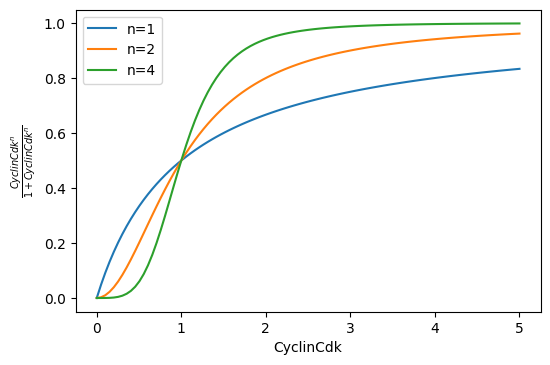

In [4]:
plt.figure(dpi=100)
CyclinCdk=np.linspace(0,5,100)
for n in [1,2,4]:
    plt.plot(CyclinCdk,CyclinCdk**n/(1+CyclinCdk**n), label=f"n={n}")
    plt.xlabel("CyclinCdk")
    plt.ylabel(r"$\frac{CyclinCdk^n}{1+CyclinCdk^n}$")
    plt.legend()

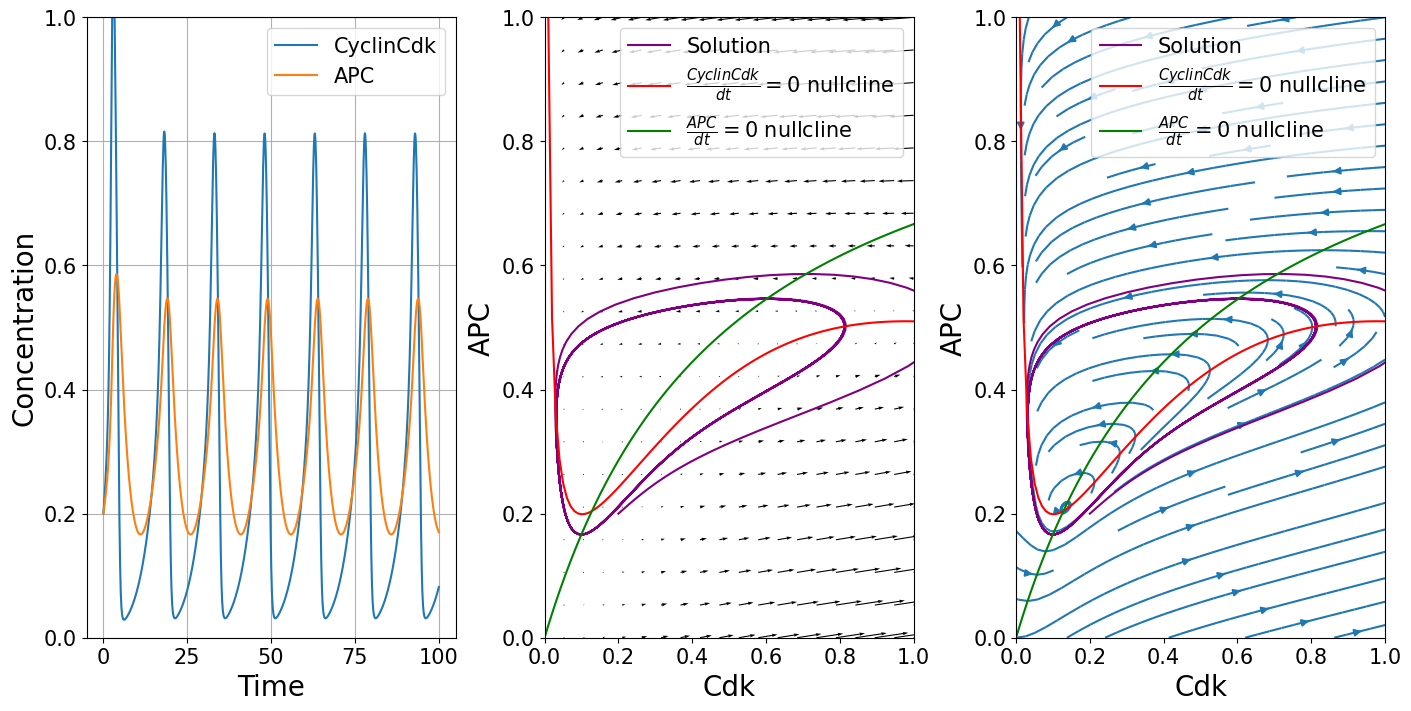

In [6]:
k1 = 0.08
k2 = 8
k3 = 8
k4 = 0.6
k5 = 0.3

# Initialize multipanel figure that will contain all the plots
fig, axs = plt.subplots(
    nrows=1, ncols=3, figsize=(14, 7), dpi=100, constrained_layout=True
)

# Solve and plot ODE use solve_ivp()
def CellCycle(t, y):
    Cdk, APC = y
    dCdkdt = k1 - k2 * Cdk * APC + k3 * (Cdk ** 2 / (1 + Cdk ** 2))
    dAPCdt = k4 * (1 - APC) * Cdk - k5 * APC
    return [dCdkdt, dAPCdt]


initial_condition = [0.2, 0.2]
tspan = [0, 100]

soln = solve_ivp(
    CellCycle,
    tspan,
    initial_condition,
    t_eval=np.linspace(tspan[0], tspan[1], 1000),
    method="DOP853",
    rtol=1e-6,
    atol=1e-12,
)

axs[0].plot(soln.t, soln.y[0], label="CyclinCdk")
axs[0].plot(soln.t, soln.y[1], label="APC")


# Plot phase portrait
APC, Cdk = np.mgrid[0:1:20j, 0:1:20j]

dCdkdt = k1 - k2 * Cdk * APC + k3 * (Cdk ** 2 / (1 + Cdk ** 2))
dAPCdt = k4 * (1 - APC) * Cdk - k5 * APC

axs[1].quiver(Cdk, APC, dCdkdt, dAPCdt)
axs[2].streamplot(Cdk, APC, dCdkdt, dAPCdt)


# Various plotting options for plot 1 only.
axs[0].set_xlabel("Time", fontsize=20)
axs[0].set_ylabel("Concentration", fontsize=20)

# Various plotting options for plots 2 and 3.
for ax in axs[1:3]:
    ax.grid(which="major", axis="both")
    ax.set_xlabel("Cdk", fontsize=20)
    ax.set_ylabel("APC", fontsize=20)
    ax.plot(soln.y[0], soln.y[1], color="purple", label="Solution")
    Cdk_range = np.linspace(1e-6, 1, 100)
    ax.plot(
        Cdk_range,
        (Cdk_range ** 2 * k3 / (Cdk_range ** 2 + 1) + k1)
        / (Cdk_range * k2),
        color="r",
        label=r"$\frac{CyclinCdk}{dt}=0$ nullcline",
    )
    ax.plot(
        Cdk_range,
        Cdk_range * k4 / (Cdk_range * k4 + k5),
        color="g",
        label=r"$\frac{APC}{dt}=0$ nullcline",
    )

# Various plotting options shares among all plots
for ax in axs:
    ax.tick_params(labelsize=15)
    ax.grid(which="major", axis="both")
    ax.set_ylim(0, 1)
    ax.legend(loc="upper right", fontsize=15)
for ax in axs[1:3]:
    ax.set_xlim(0, 1)

Note that the key difference between this oscillating cell cycle model and Lotka-Volterra model is that the oscillations in this model are stable to initial conditions choice. These type of oscillation are called limit cycle and are prevalent across biology (e.g. heart pacemaker, cell cycle).  
  
  Try different initial conditions to ensure that oscillations don't change.